In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
data = pd.read_csv('Household energy bill data.csv')
data.head()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,9675.93,2,0,560.481447
1,1,5,952.99,0,1,0,35064.79,1,1,633.283679
2,3,1,761.44,1,1,1,22292.44,0,0,511.879157
3,0,5,861.32,1,1,0,12139.08,0,0,332.992035
4,1,8,731.61,0,1,0,17230.10,2,1,658.285625


In [34]:
!pip install sweetviz


                                             |                                                                …


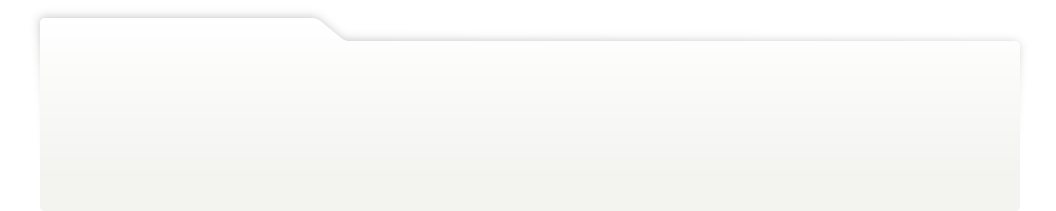
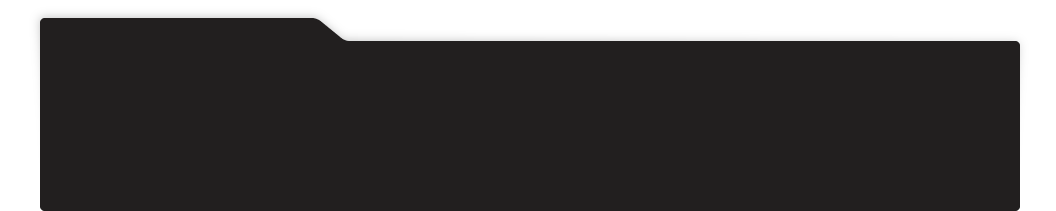
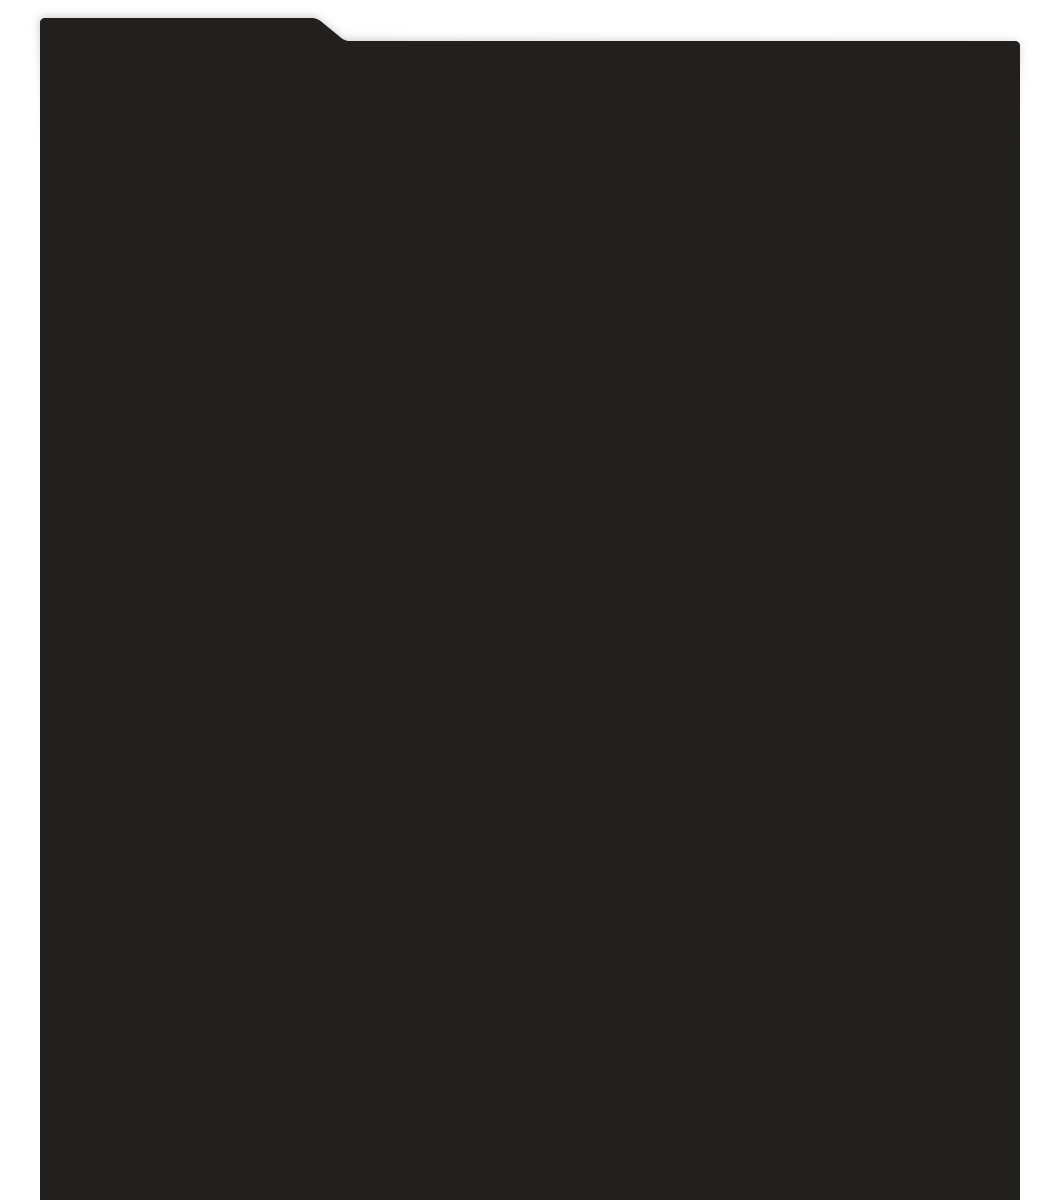
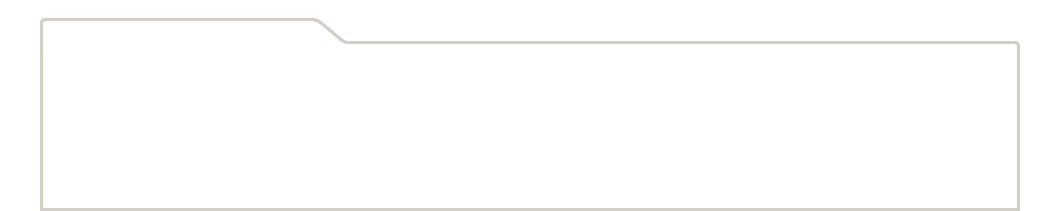
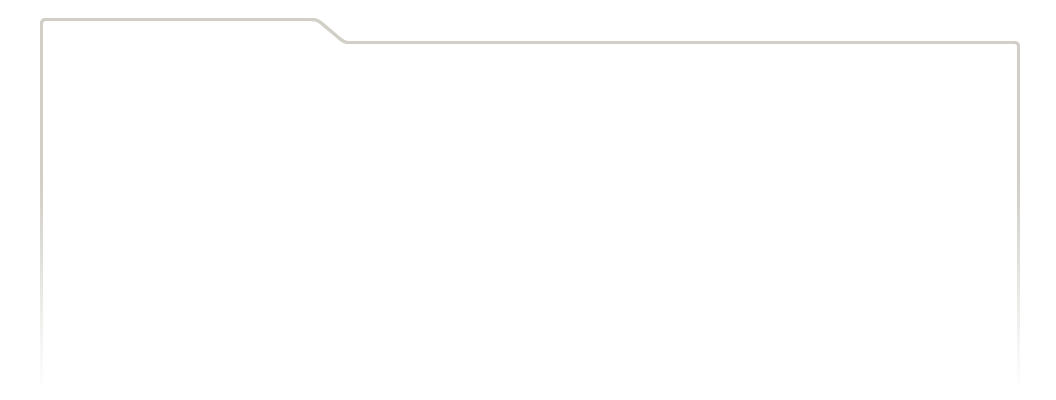
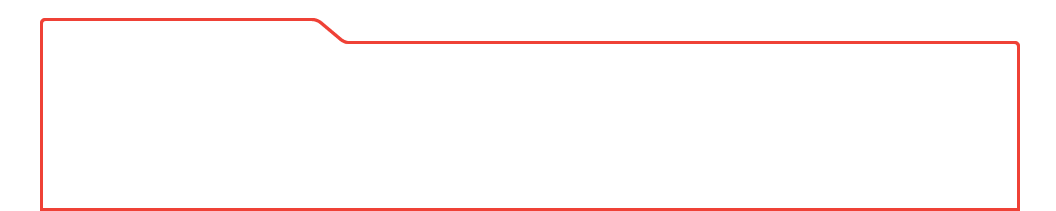
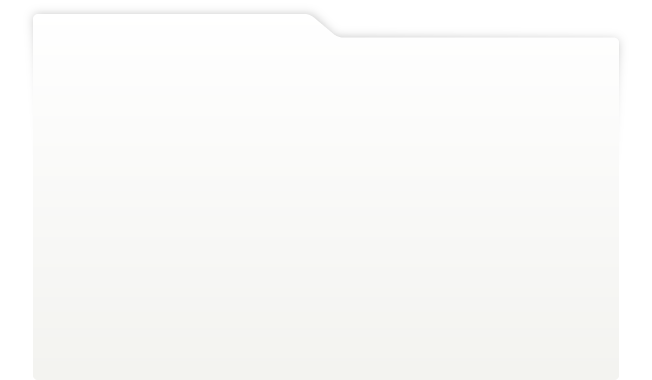
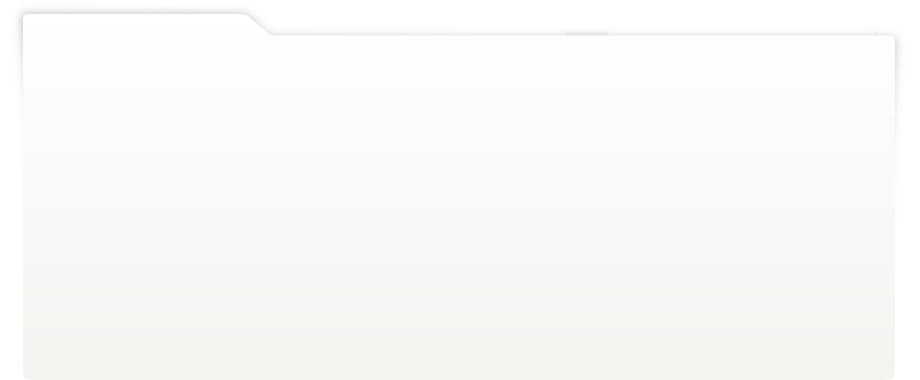
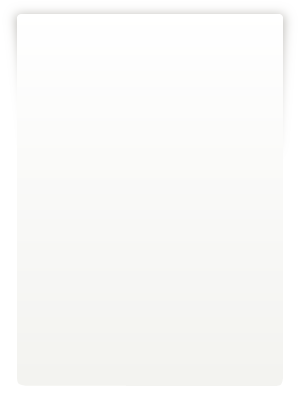
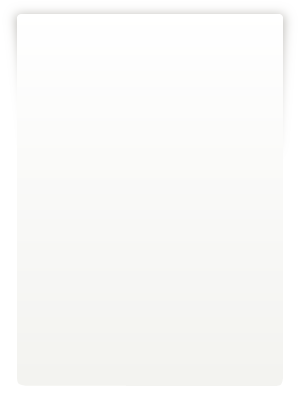
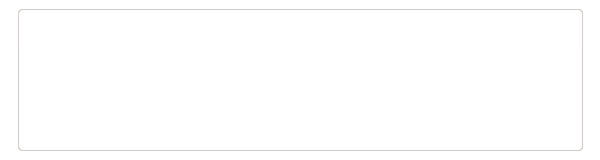
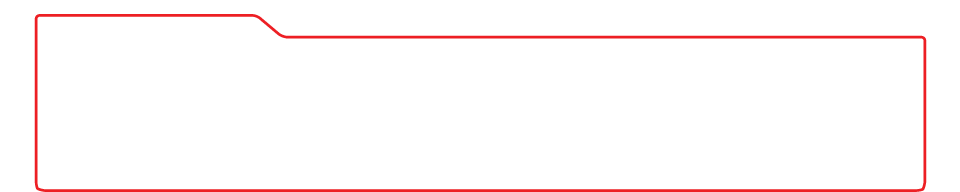
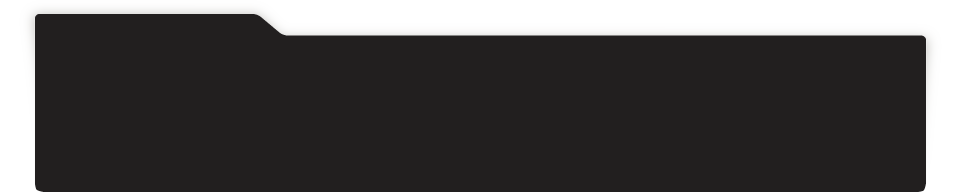
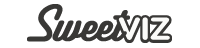
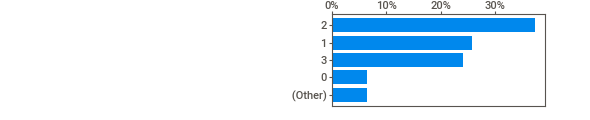
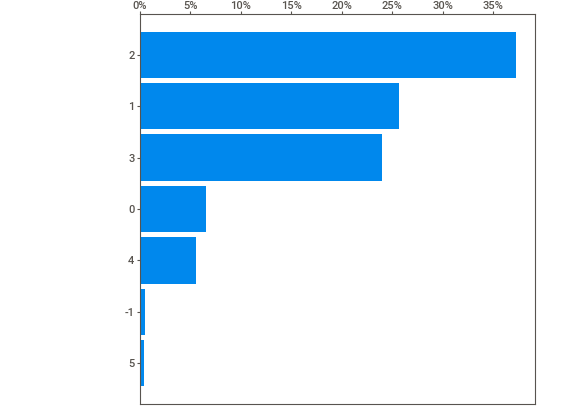
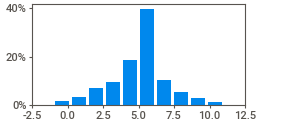
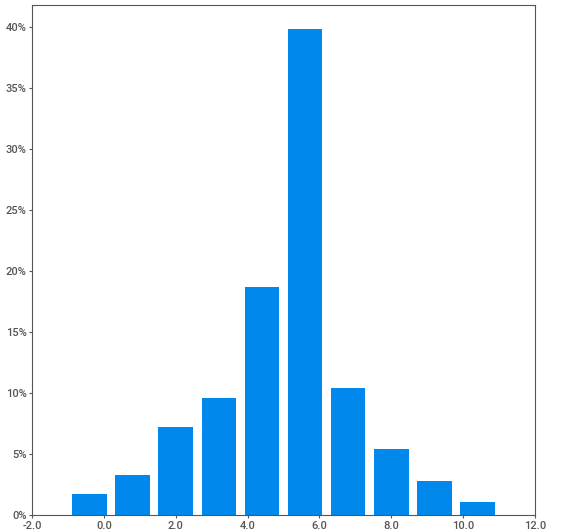
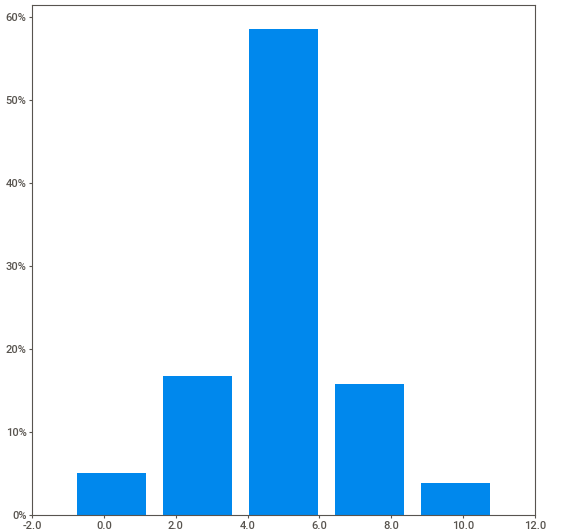
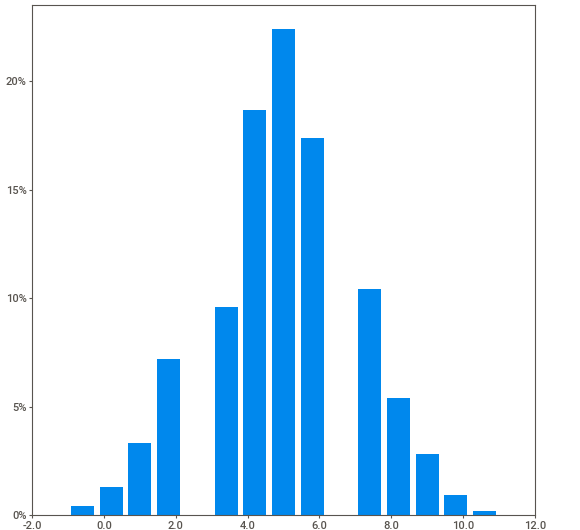
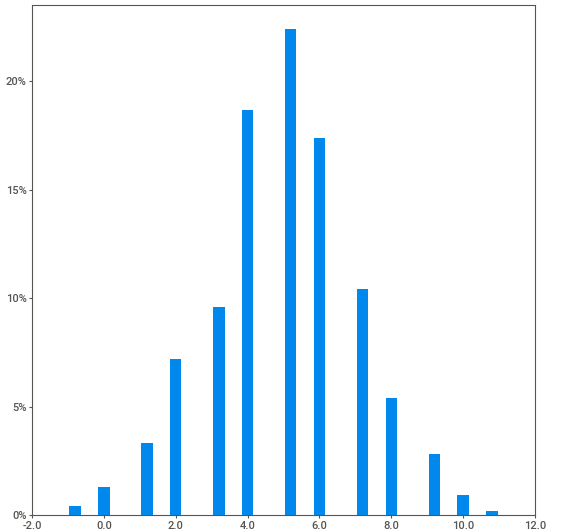
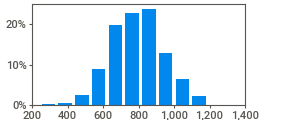
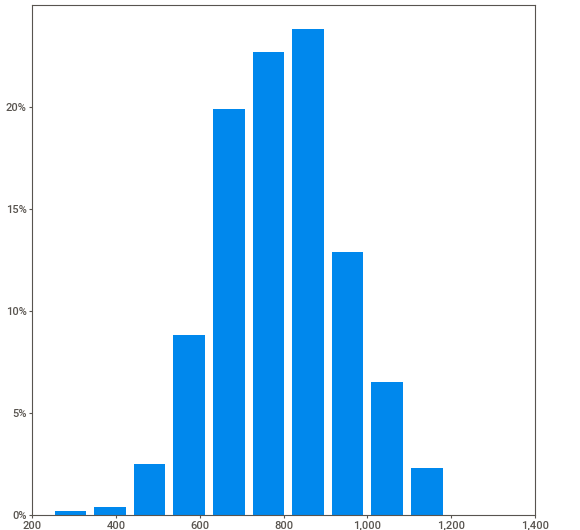
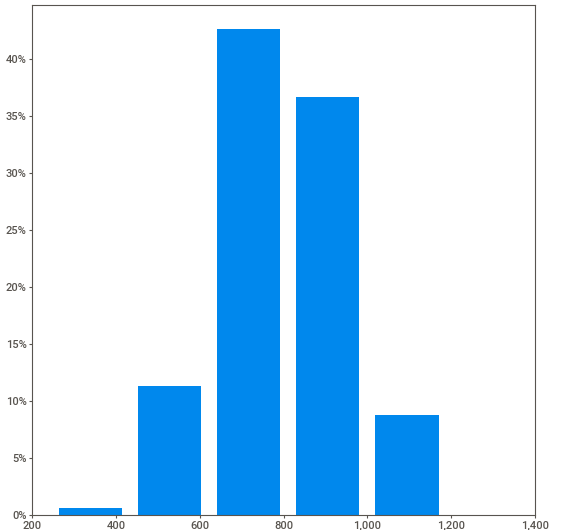
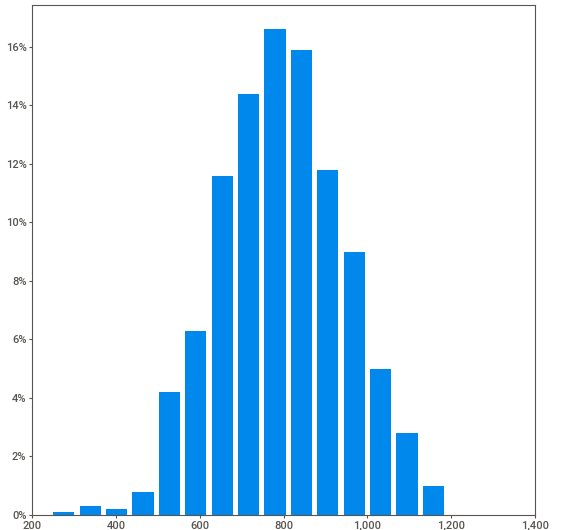
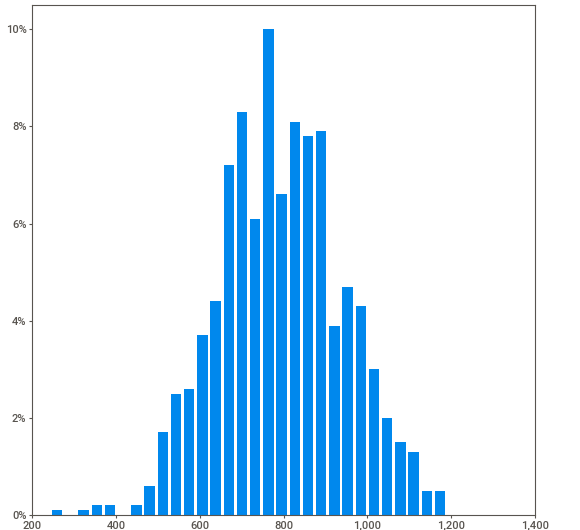
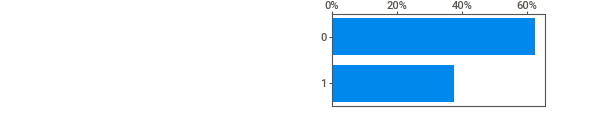
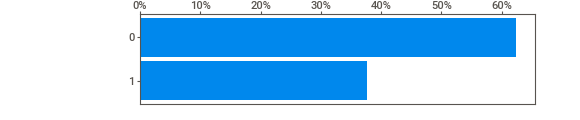
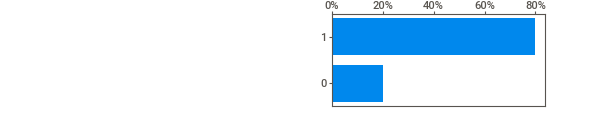
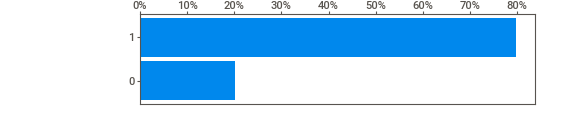
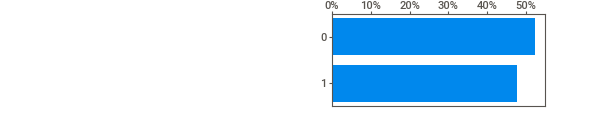
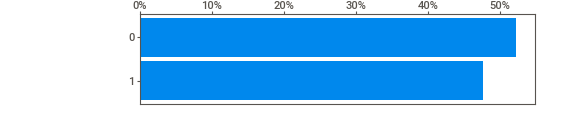
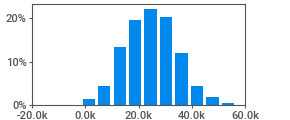
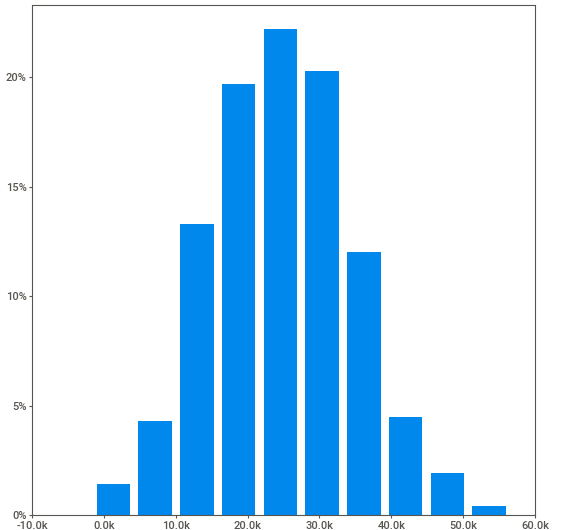
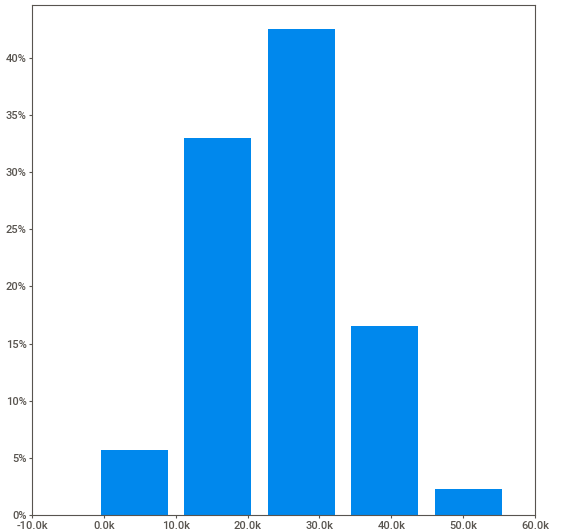
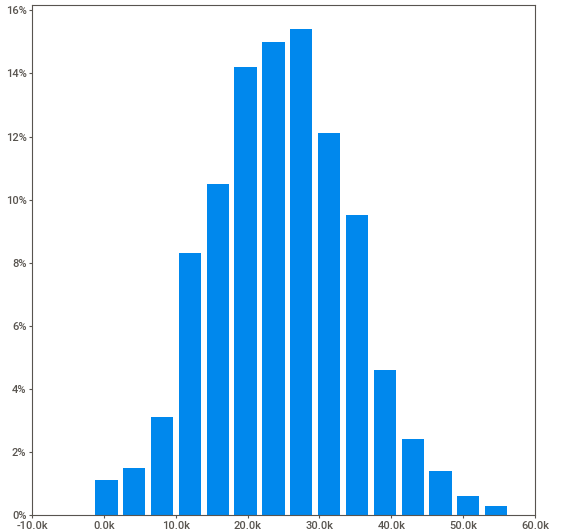
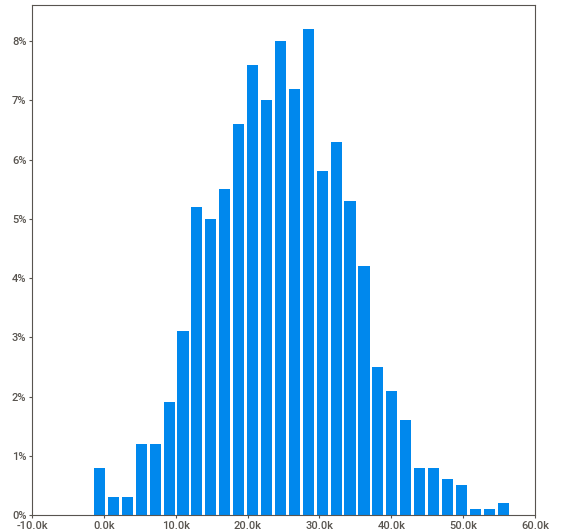
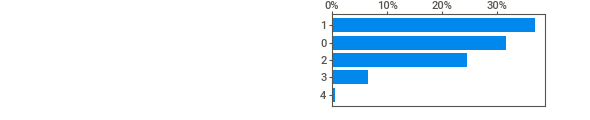
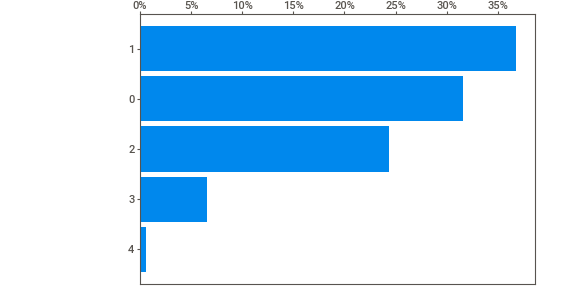
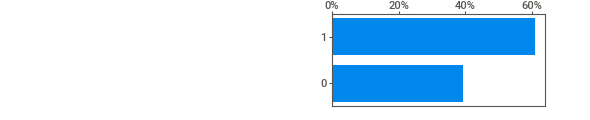
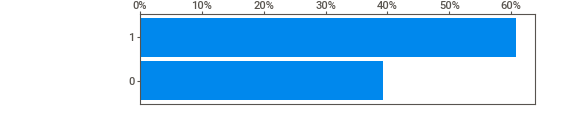
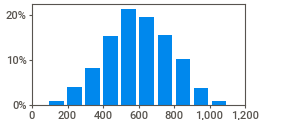
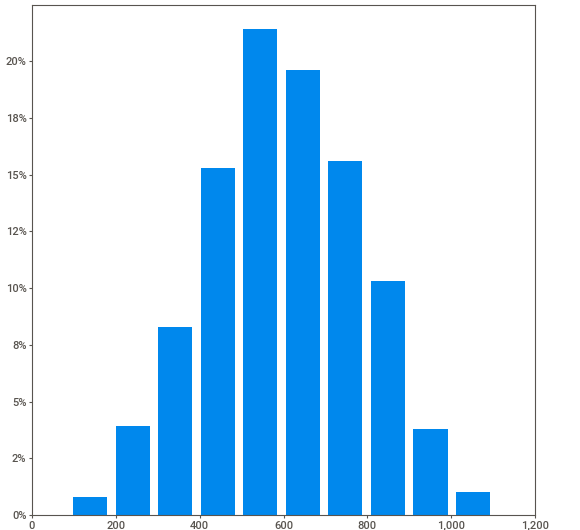
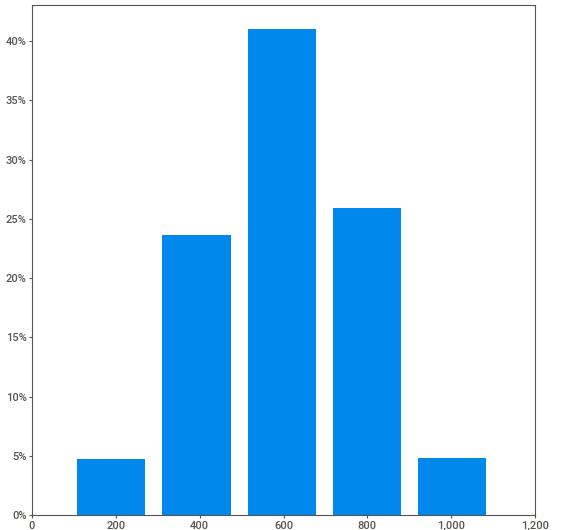
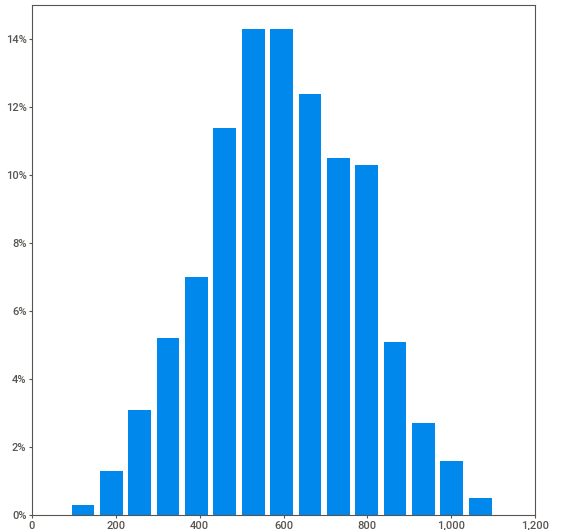
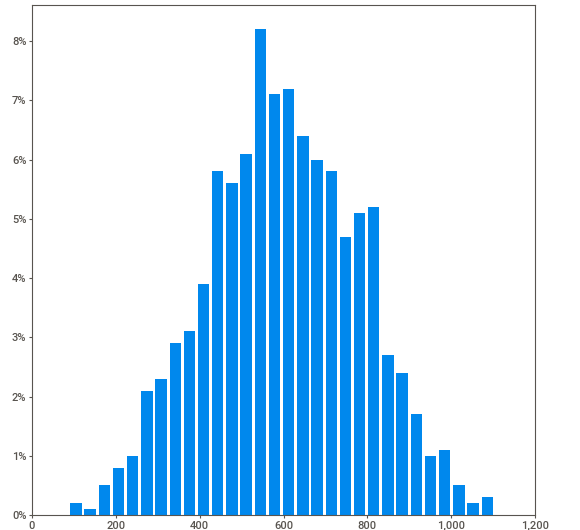
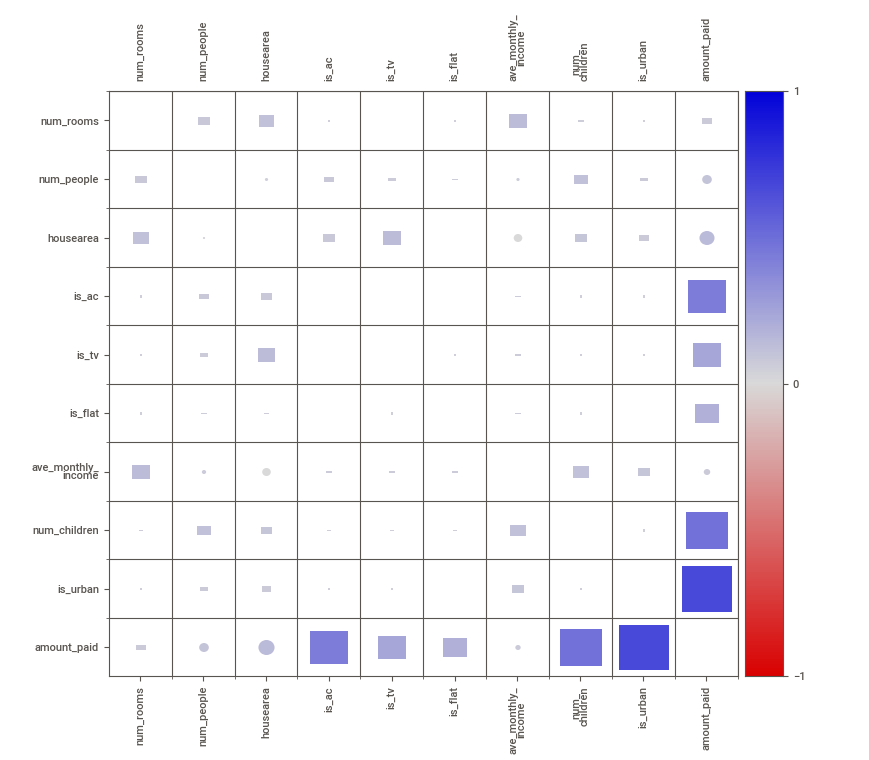
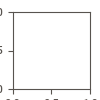

In [35]:
import sweetviz as sv
advert_report = sv.analyze(data)
advert_report.show_notebook()


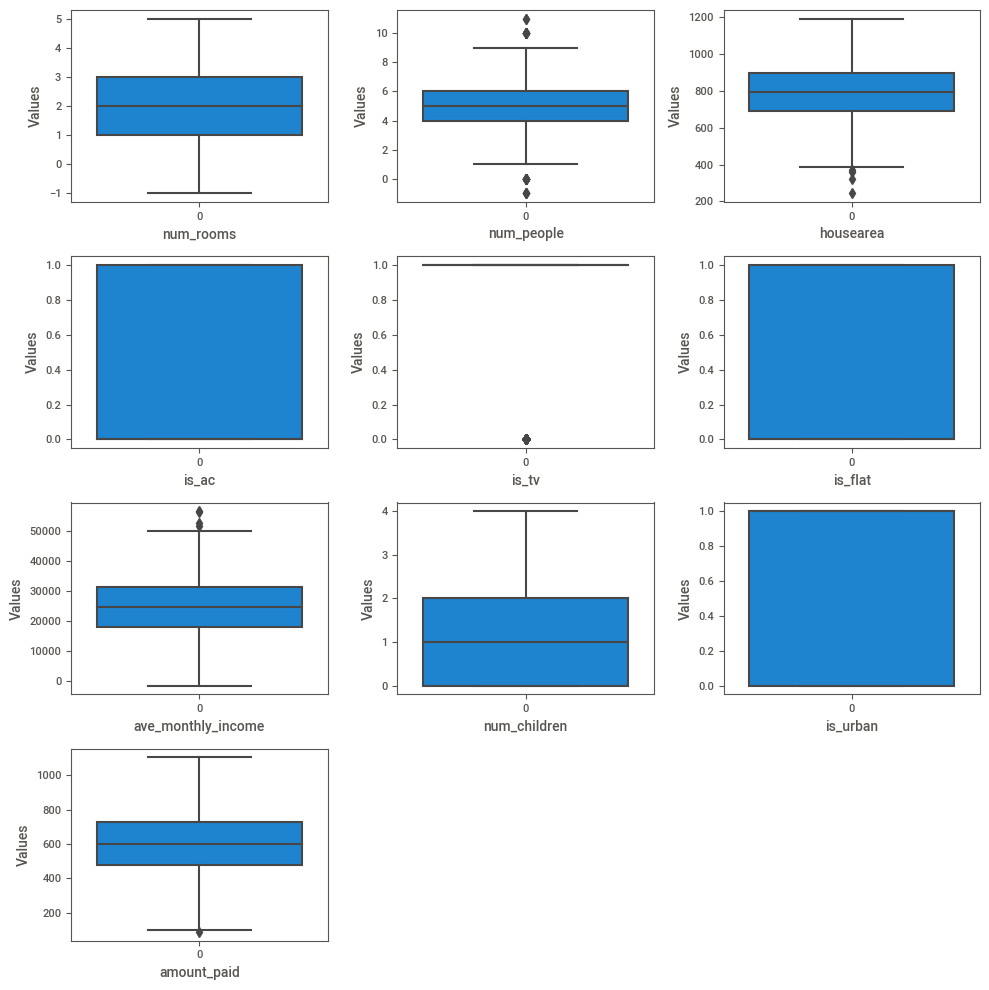

In [36]:
plt.figure(figsize=(10, 10))
for i, column in enumerate(data.columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data[column])


    plt.xlabel(column)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()


/var/folders/dt/y1n9m2w57xj2xyydx20kvy540000gn/T/ipykernel_33279/2345663601.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i[1]])
/var/folders/dt/y1n9m2w57xj2xyydx20kvy540000gn/T/ipykernel_33279/2345663601.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i[1]])
/var/folders/dt/

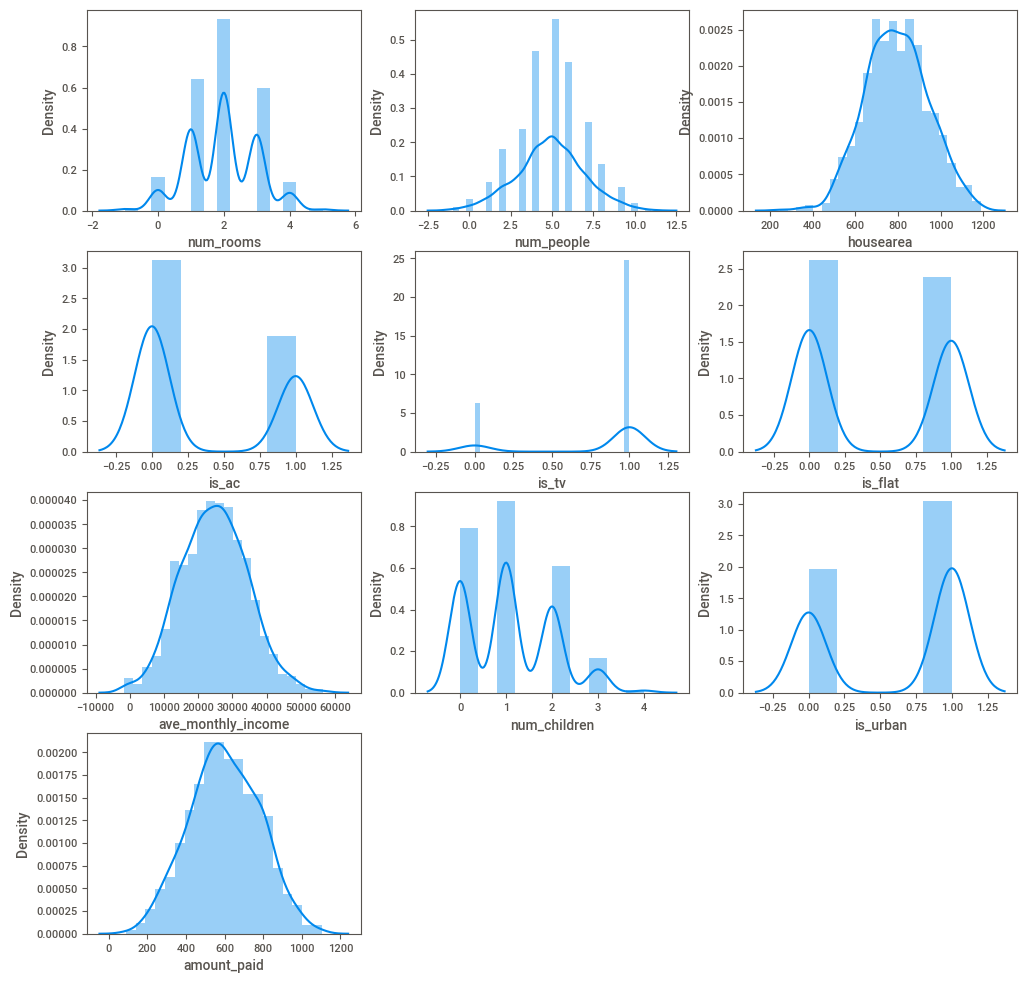

In [37]:
plt.figure(figsize=(12,12))
for i in enumerate(data.columns):
    plt.subplot(4,3,i[0]+1)
    sns.distplot(data[i[1]])

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from time import time
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df = pd.read_csv('Household energy bill data.csv')

The dataset contains 1000 rows and 10 columns.

These are the columns and the type of data they contain:
num_rooms               int64
num_people              int64
housearea             float64
is_ac                   int64
is_tv                   int64
is_flat                 int64
ave_monthly_income    float64
num_children            int64
is_urban                int64
amount_paid           float64
dtype: object


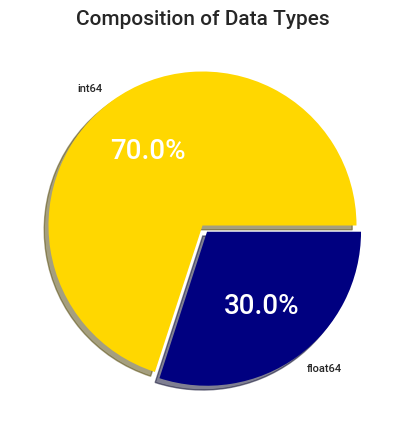

In [39]:
print('The dataset contains {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

print('\nThese are the columns and the type of data they contain:')
print(df.dtypes)

freq = Counter(list(df.dtypes))
freq = pd.DataFrame.from_dict(freq, orient='index')

fig, ax = plt.subplots(figsize = (5, 5))
_, _, freq_pie = plt.pie(freq[0], labels = ['int64', 'float64'], colors = ['gold', 'navy'],
                         explode = [0, .05], shadow = True, autopct='%1.1f%%')
plt.setp(freq_pie, **{'color' : 'white', 'weight':'bold', 'fontsize' : 20})
plt.title('Composition of Data Types', fontsize = 15)
plt.show()

In [40]:
df.describe()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.962000,4.897000,794.703420,0.376000,0.798000,0.477000,24684.986550,1.078000,0.608000,600.396359
std,1.030348,2.007591,147.771736,0.484622,0.401693,0.499721,9678.228224,0.934232,0.488441,181.406210
min,-1.000000,-1.000000,244.400000,0.000000,0.000000,0.000000,-1576.440000,0.000000,0.000000,87.851850
25%,1.000000,4.000000,691.037500,0.000000,1.000000,0.000000,18036.762500,0.000000,0.000000,475.065141
50%,2.000000,5.000000,789.970000,0.000000,1.000000,0.000000,24742.575000,1.000000,1.000000,598.331726
75%,3.000000,6.000000,892.955000,1.000000,1.000000,1.000000,31402.357500,2.000000,1.000000,729.930489
max,5.000000,11.000000,1189.120000,1.000000,1.000000,1.000000,56531.080000,4.000000,1.000000,1102.994109


/var/folders/dt/y1n9m2w57xj2xyydx20kvy540000gn/T/ipykernel_33279/1520342397.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


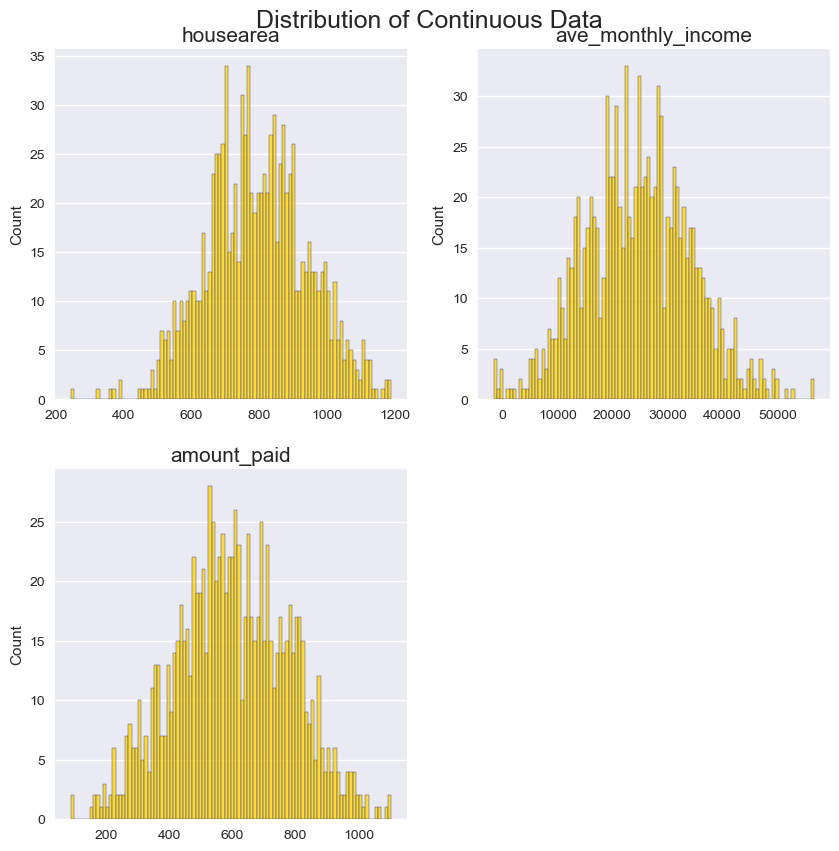

In [41]:
is_numeric = []
for col in df.columns:
    is_numeric.append(df[col].dtypes == 'float64')
df_numeric = df.columns[is_numeric]

plt.style.use('seaborn')
fig, axes = plt.subplots(2, 2, figsize = (10, 10))
axes[1][1].remove()

i = 0
for ax_group in axes:
    for axis in ax_group:
        if i == 3:
            continue
        else:
            sns.histplot(df[df_numeric[i]], bins = 100, ax = axis, color = 'gold', edgecolor = 'navy')
            axis.set_xlabel('')
            axis.grid(axis = 'x')
            axis.set_title(df_numeric[i], fontsize = 15)
        i = i+1
plt.suptitle('Distribution of Continuous Data', fontsize = 18, y = .92)
plt.show()

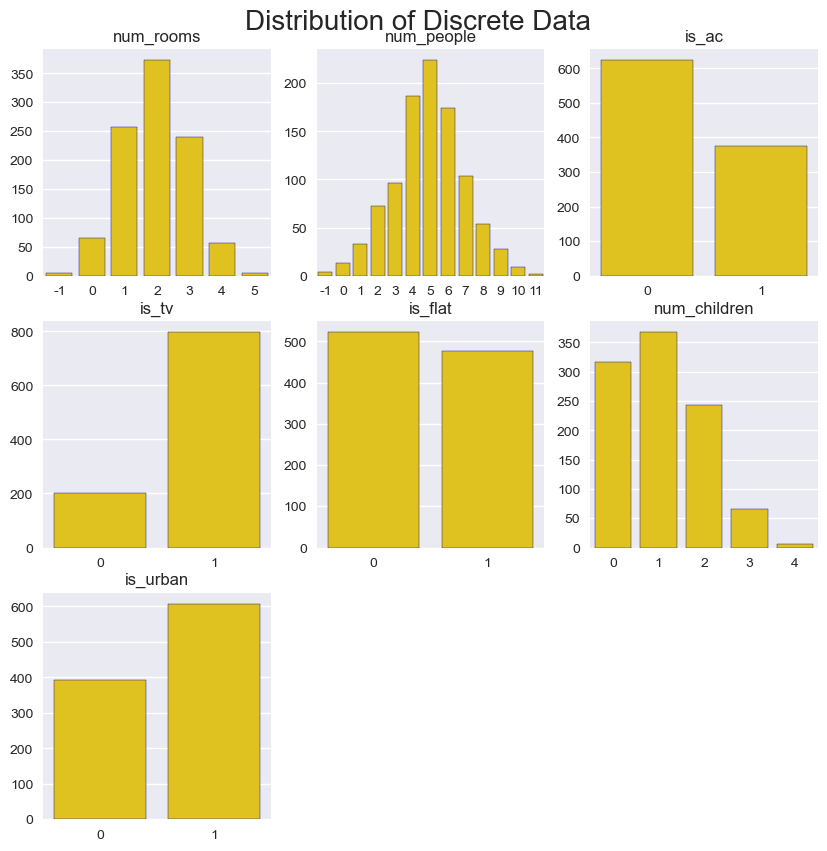

In [42]:
discrete = [not x for x in is_numeric]
df_discrete = df.columns[discrete]

#Create the histograms
fig, axes = plt.subplots(3, 3, figsize = (10,10))
axes[2][1].remove()
axes[2][2].remove()

i = 0
j = 0
for col in df_discrete:
    unique_values = df[col].unique()
    unique_values.sort()
    count_unique = []

    for values in unique_values:
        count_unique.append((df[col] == values).sum())

    sns.barplot(x = unique_values, y = count_unique, ax = axes[j][i], color = 'gold', edgecolor = 'navy')
    axes[j][i].set_title(col)

    if i == 2:
        j = j + 1
        i = 0
    else:
        i = i + 1
plt.suptitle('Distribution of Discrete Data', fontsize = 20, y = .92)
plt.show()


In [43]:
#It is not logical for a house to have -1 rooms or people, so we will change those values to 0.
#Also, some values in ave_monthly_income are negative, these will be changed to the mean of the column.
df.loc[df['num_rooms'] <= 0, 'num_rooms'] = round(df['num_rooms'].mean())
df.loc[df['num_people'] <= 0, 'num_people'] = round(df['num_people'].mean())

df.loc[df['ave_monthly_income'] < 0, 'ave_monthly_income'] = df['ave_monthly_income'].mean()

The dataset contains 0 duplicated rows.


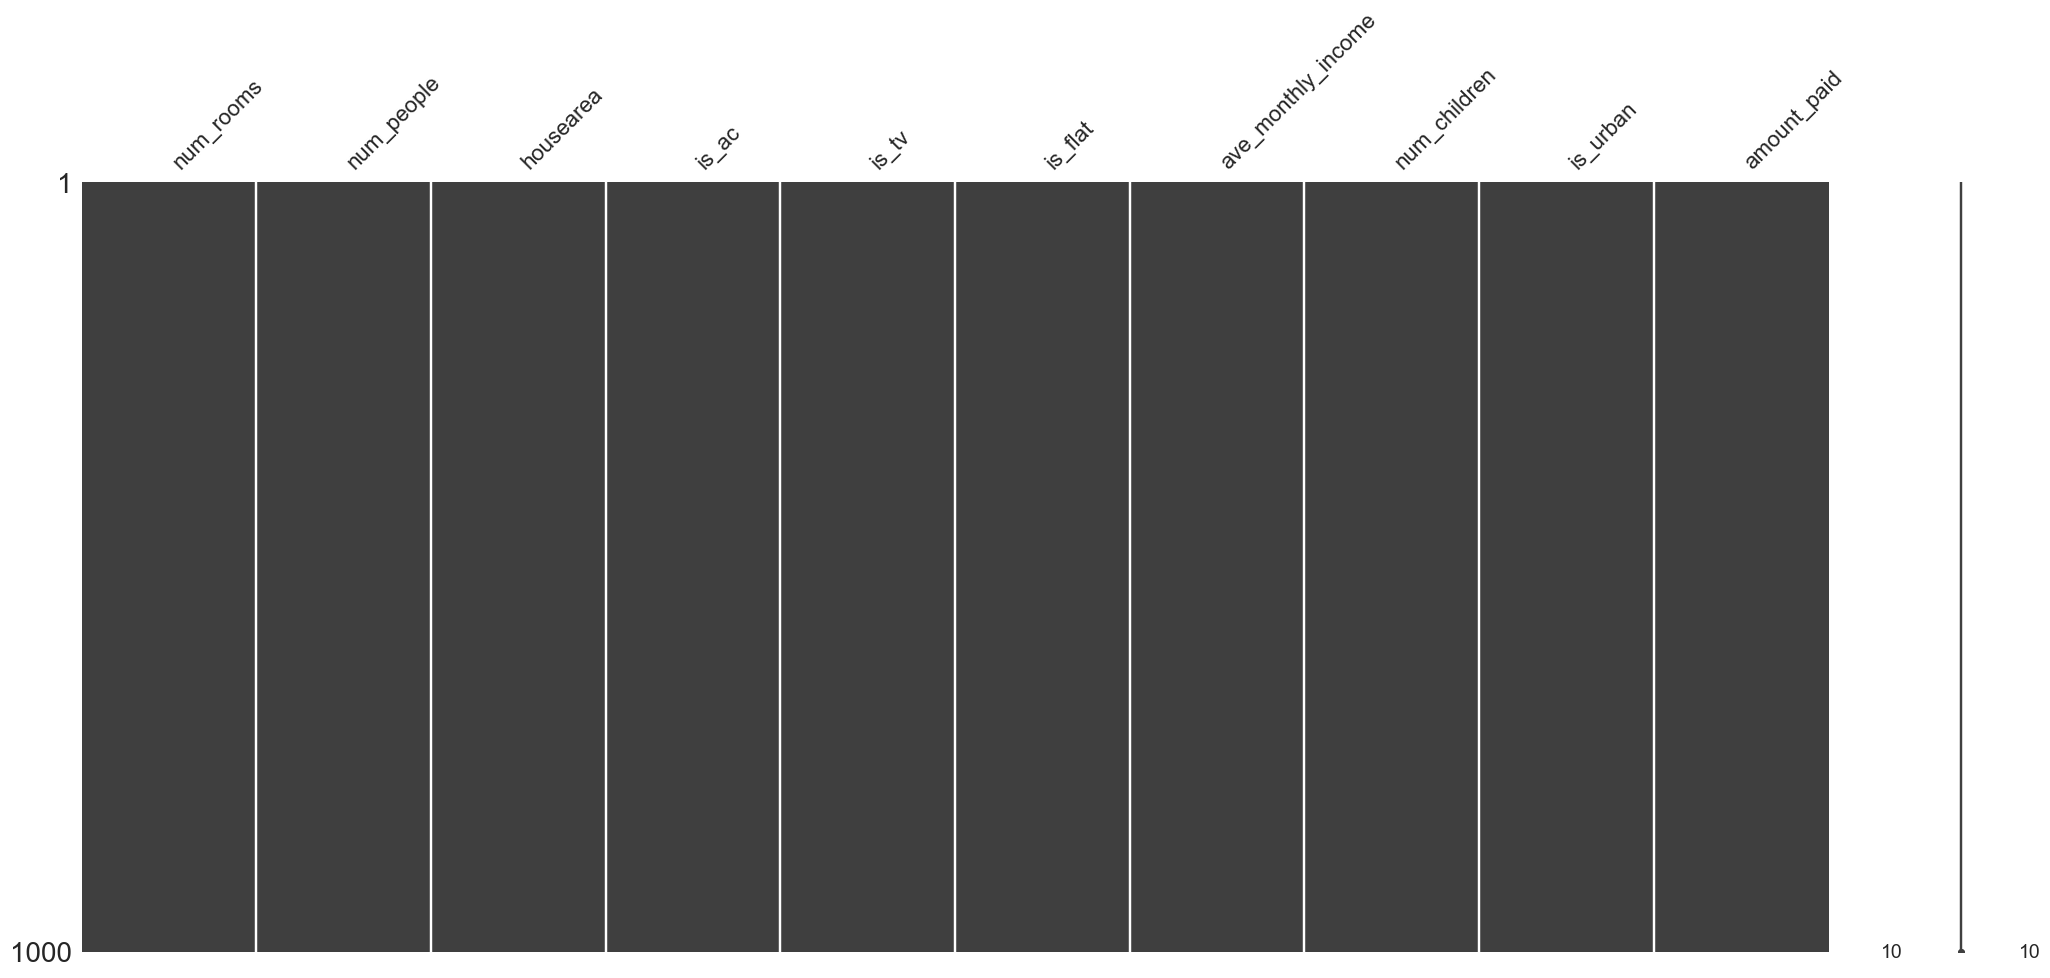

In [44]:
#Next, we will see if the dataset contains any duplicated rows or null values.
#The second one will be achieved by text and by visual representation showing white rectangles for null values.
print('The dataset contains {} duplicated rows.'.format(df.duplicated().sum()))
msno.matrix(df)
plt.show()

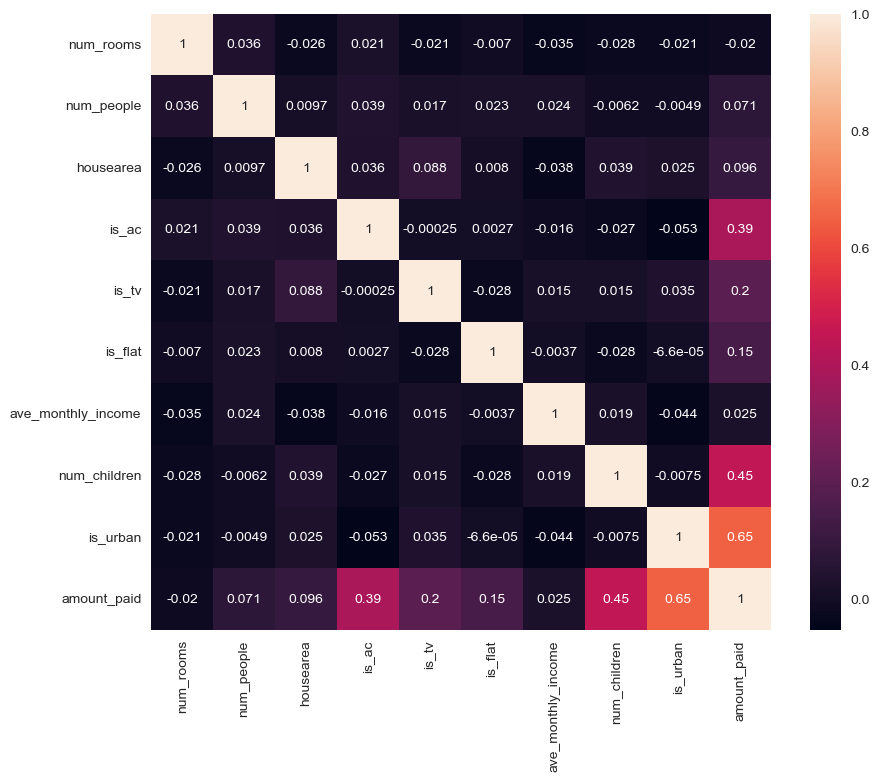

In [45]:
#Finally, show the correlation between each column.
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [46]:
#Data Transformation
scale_columns = ['num_rooms', 'num_people', 'housearea', 'ave_monthly_income', 'num_children']
df[scale_columns].head()


,num_rooms,num_people,housearea,ave_monthly_income,num_children
0,3,3,742.57,9675.93,2
1,1,5,952.99,35064.79,1
2,3,1,761.44,22292.44,0
3,2,5,861.32,12139.08,0
4,1,8,731.61,17230.10,2


In [47]:
scaler = StandardScaler()

#Scale the columns previously selected and replace them in the dataset
df[scale_columns] = scaler.fit_transform(df[scale_columns])
df.head()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
0,1.034220,-1.051426,-0.352973,1,1,1,-1.601661,0.987401,0,560.481447
1,-1.282062,0.007412,1.071692,0,1,0,1.080224,-0.083533,1,633.283679
2,1.034220,-2.110264,-0.225213,1,1,1,-0.268949,-1.154467,0,511.879157
3,-0.123921,0.007412,0.451033,1,1,0,-1.341473,-1.154467,0,332.992035
4,-1.282062,1.595669,-0.427179,0,1,0,-0.803696,0.987401,1,658.285625


In [48]:
#Before training the models I will check if any of the features have a low variance,
#meaning they do not change much and so they do not affect the model.
vt = VarianceThreshold()

features = df.iloc[:, :9]
vt = vt.fit_transform(features)
print('The dataset contains {} features.'.format(features.shape[1]))
print('The selector contains {} features.'.format(vt.shape[1]))

The dataset contains 9 features.
The selector contains 9 features.


In [49]:
#Splitting the data into training data ad testing data
x = df.iloc[:, :9]
y = df['amount_paid']

#The train set will have 80% of the data and the other 20% will be for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 9)


In [50]:
#Testing Models
scores = pd.DataFrame(columns = ['Random Search', 'Grid Search'])


In [51]:
#Linear Regression
model_LR = LinearRegression()

model_LR.fit(x_train,y_train)
y_pred = model_LR.predict(x_test)
results_linear = r2_score(y_test, y_pred)
# scores = scores.concat({'Random Search' : results_linear, 'Grid Search' : results_linear},
#                        ignore_index = True)
scores = pd.concat([scores, pd.DataFrame({'Random Search': [results_linear], 'Grid Search': [results_linear]})],
                   ignore_index=True)

results_linear

0.8730027227056842

In [53]:
#Ridge
model_R = Ridge(random_state = 9)
grid_R = GridSearchCV(model_R,
                      {'alpha' : [0, .25, .5, .75, 1]},
                      cv = 10)
grid_R.fit(x, y)
results_R = pd.DataFrame(grid_R.cv_results_).sort_values('mean_test_score',
                                                         ascending = False)
results_R = results_R[['param_alpha', 'mean_test_score']]
# scores = scores.append({'Random Search' : results_R.iloc[0, -1], 'Grid Search' : results_R.iloc[0, -1]},
#                        ignore_index = True)
new_scores = pd.DataFrame({'Random Search': results_R.iloc[0, -1], 'Grid Search': results_R.iloc[0, -1]}, index=[0])
scores = pd.concat([scores, new_scores], ignore_index=True)

# scores = pd.concat([scores, pd.DataFrame({'Random Search' : results_R.iloc[0, -1], 'Grid Search' : results_R.iloc[0, -1]})],
#                        ignore_index = True)
results_R

,param_alpha,mean_test_score
4,1,0.875090
3,0.75,0.875089
2,0.5,0.875085
1,0.25,0.875080
0,0,0.875072


In [55]:
#Lasso
model_La = Lasso(random_state = 9)
grid_La = GridSearchCV(model_La,
                       {'alpha' : [.1, .25, .5, .75, 1]},
                       cv = 10)
grid_La.fit(x, y)
results_La = pd.DataFrame(grid_La.cv_results_).sort_values('mean_test_score',
                                                           ascending = False)
results_La = results_La[['param_alpha', 'mean_test_score']]
# scores = scores.append({'Random Search' : results_La.iloc[0, -1], 'Grid Search' : results_La.iloc[0, -1]},
#                        ignore_index = True)
new_scores_La = pd.DataFrame({'Random Search': results_La.iloc[0, -1], 'Grid Search': results_La.iloc[0, -1]}, index=[0])
scores = pd.concat([scores, new_scores_La], ignore_index=True)
results_La

,param_alpha,mean_test_score
2,0.5,0.875228
1,0.25,0.875199
3,0.75,0.875164
0,0.1,0.875133
4,1,0.875010


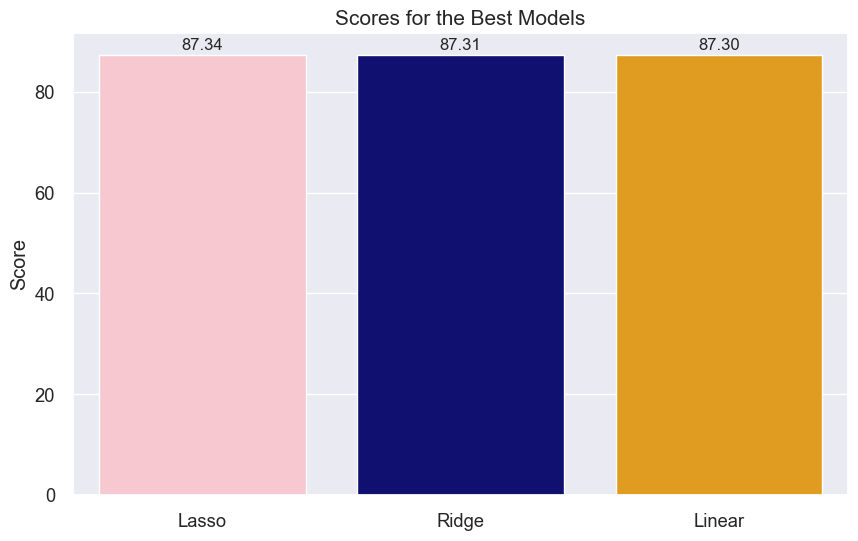

In [56]:
Ridge_final = Ridge(alpha = 1, random_state = 10)
Lasso_final = Lasso(alpha = .5, random_state = 10)
Linear_final = LinearRegression()

Ridge_final.fit(x_train, y_train)
Lasso_final.fit(x_train, y_train)
Linear_final.fit(x_train, y_train)

Ridge_predict = Ridge_final.predict(x_test)
Lasso_predict = Lasso_final.predict(x_test)
Linear_predict = Linear_final.predict(x_test)


Ridge_score = r2_score(y_test, Ridge_predict)
Lasso_score = r2_score(y_test, Lasso_predict)
Linear_score = r2_score(y_test, Linear_predict)
bar_x = ['Ridge', 'Lasso', 'Linear']
bar_y = [Ridge_score * 100, Lasso_score * 100, Linear_score * 100]

bar_df = pd.DataFrame(bar_y, bar_x, columns = ['Score'])
bar_df = bar_df.sort_values('Score', ascending = False)

sns.set(font_scale = 1.2)
plt.figure(figsize = (10, 6))
palette = ['pink', 'navy', 'orange']
final_bar = sns.barplot(x = bar_df.index, y = bar_df['Score'], palette = palette)

for p in final_bar.patches:
    final_bar.annotate(format(p.get_height(), '.2f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 7), size = 12,
                       textcoords = 'offset points')

plt.title('Scores for the Best Models', fontsize = 15)
plt.show()

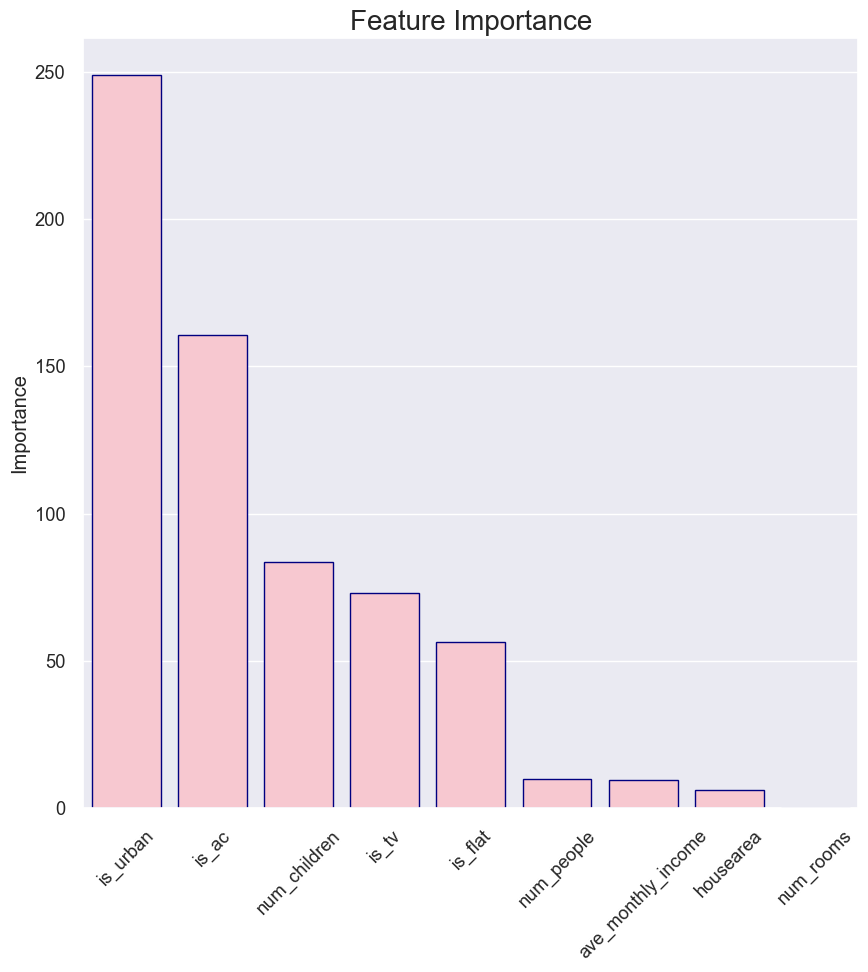

In [57]:
importance = Lasso_final.coef_
importance = np.abs(importance)

feature_importance = pd.DataFrame(list(zip(x_train.columns, importance)),
                                 columns = ['Feature', 'Importance'])

feature_importance = feature_importance.sort_values('Importance',
                                                    ascending = False).reset_index(drop = True)
plt.figure(figsize = (10, 10))
sns.barplot(x = feature_importance['Feature'], y = feature_importance['Importance'], color = 'pink', edgecolor = 'navy')
plt.xticks(rotation = 45)
plt.xlabel('')
plt.title('Feature Importance', fontsize = 20)
plt.show()

/var/folders/dt/y1n9m2w57xj2xyydx20kvy540000gn/T/ipykernel_33279/1279358289.py:9: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = 'Category', y = 'amount_paid', data = urban_df, palette = palette)


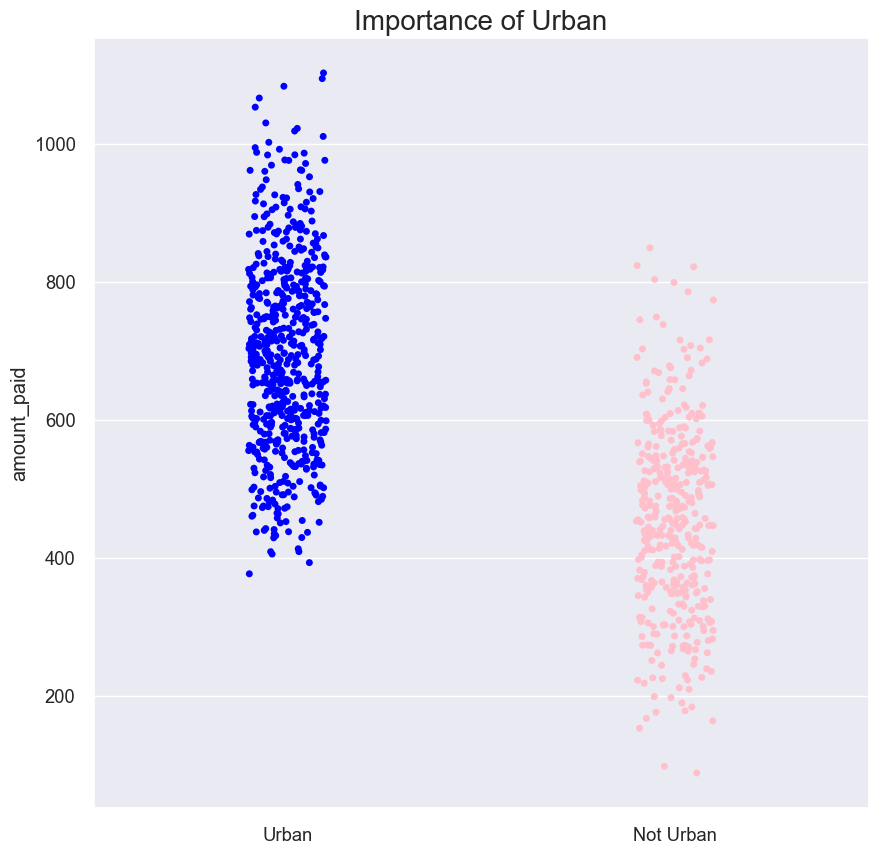

In [58]:
urban = df.loc[df['is_urban'] == 1, 'amount_paid']
not_urban = df.loc[df['is_urban'] == 0, 'amount_paid']
urban_df = pd.concat([urban, not_urban]).reset_index(drop = True)
urban_df = pd.DataFrame(urban_df)
urban_df['Category'] = np.where(urban_df.index >= len(urban), 'Not Urban', 'Urban')

plt.figure(figsize = (10, 10))
palette = ['blue', 'pink']
sns.stripplot(x = 'Category', y = 'amount_paid', data = urban_df, palette = palette)
plt.xlabel('')
plt.title('Importance of Urban', fontsize = 20);

In [59]:
#COMPARING VALUES
y_values = list(zip(y_test, Lasso_predict))
y_values = pd.DataFrame(y_values, columns = ['Target', 'Prediction'])

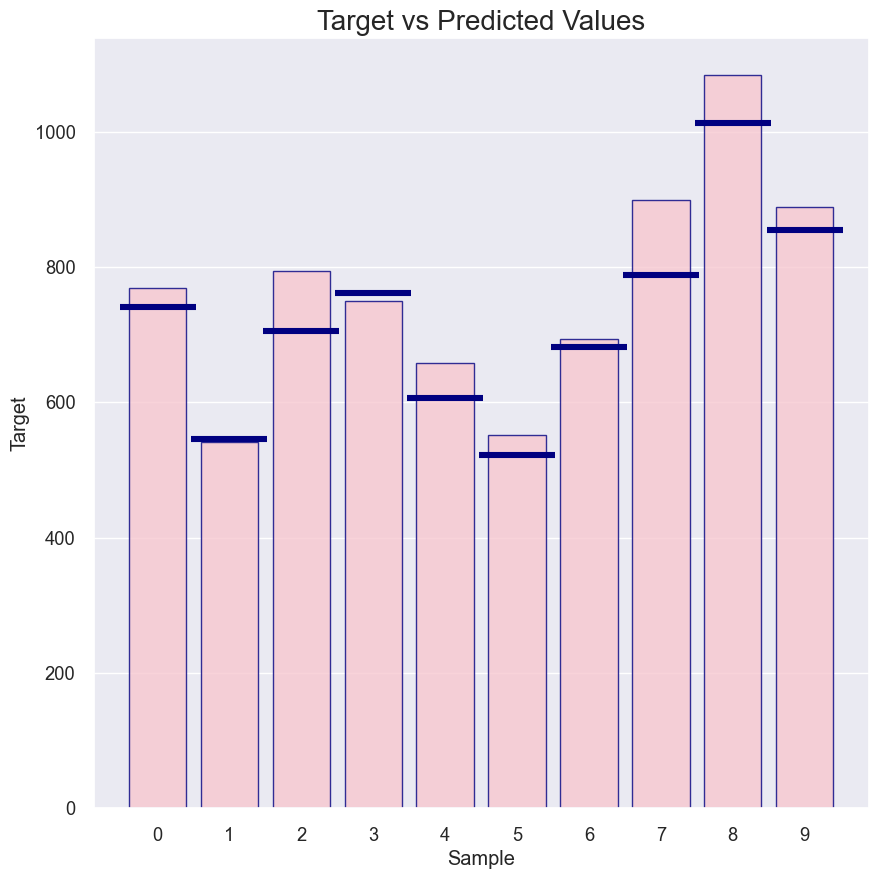

In [60]:
sample = y_values.sample(10).reset_index(drop = True)
plt.figure(figsize = (10, 10))
sns.barplot(x = sample.index, y = sample['Target'], color = 'pink', edgecolor = 'navy', alpha = .8)
sns.scatterplot(x = sample.index, y = sample['Prediction'], color = 'navy',
                marker = '_', s = 3000)
plt.xlabel('Sample')
plt.title('Target vs Predicted Values', fontsize = 20)
plt.show()